In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assignment: Choose any dataset from UCI Machine learning Repo/Github/Kaggle and build a model. Submit on github**

In [4]:
df= pd.read_csv('housing_price_dataset.csv')
df[:2]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626


# Create a ML model which can predict Price of house on the basis of SquareFeet

In [5]:
df.shape

(50000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


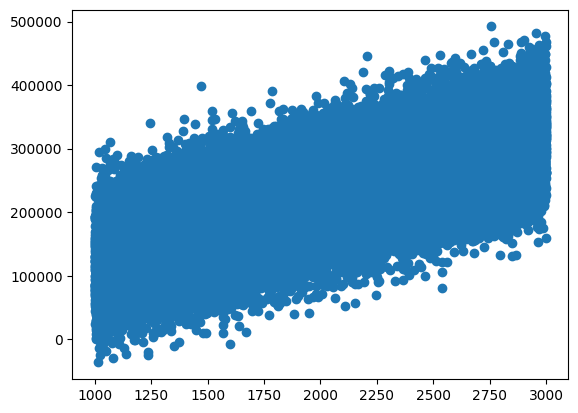

In [7]:
# check relationship
plt.scatter(df.SquareFeet, df.Price)

In [8]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [17]:
#input

X= df[['SquareFeet']]
X[:2]


,SquareFeet
0,2126
1,2459


In [13]:
df[['SquareFeet']].ndim # [['YearsExperience']] returns a DataFrame,

2

In [15]:
df.SquareFeet.ndim # df.SquareFeet would return the 'SquareFeet' column as a Pandas Series.

1

In [21]:
# y / output can be 1D or 3D

y=df.Price
y[:2]

0    215355.283618
1    195014.221626
Name: Price, dtype: float64

In [25]:
df[['SquareFeet', 'Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [27]:
# build a model

from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model

LinearRegression()

In [31]:
# training

model.fit(X,y)

LinearRegression()

In [33]:
# check data accuracy

model.score(X,y)*100


56.35801965977383

In [35]:
# testing

# Check Price for 3000 sq ft house
model.predict([[3000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([323516.28602345])

In [37]:

# Check Price for 8000 sq ft house
model.predict([[8000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([820126.82364776])

In [47]:
Areas= [[500],[2000],[5000],[2450],[7650],[4000],[9000]]
Areas

[[500], [2000], [5000], [2450], [7650], [4000], [9000]]

In [48]:
# predict for above records
predict= model.predict(Areas)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 75211.0172113 , 224194.17849859, 522160.50107317, 268889.12688478,
       785364.08601405, 422838.39354831, 919448.93117262])

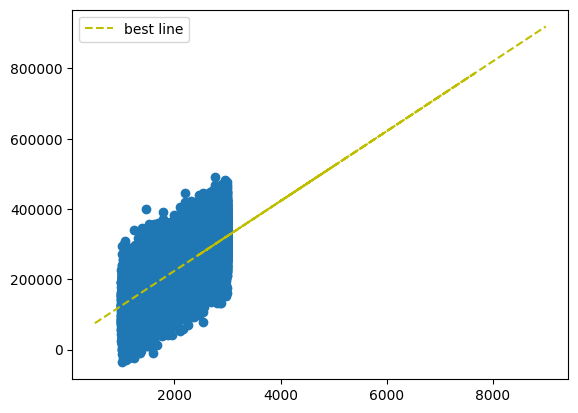

In [60]:
# plot prediction line

plt.plot(Areas,predict,'--y', label='best line' )

# Add points
plt.scatter(X,y)
plt.legend()

#'b': blue,'g': green,'r': red,'c': cyan,'m': magenta,'y': yellow,'k': black,'w': white

In [61]:
#m = slope
model.coef_

array([99.32210752])

In [62]:
# c
model.intercept_

25549.963448873197